In [1]:
pip install scikit-learn

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

In [7]:
# Normalize the relevant columns
normalized_data = scaler.fit_transform(df_market_data)

# Create a new DataFrame with the normalized data
df_normalized = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the first 10 rows of the normalized DataFrame
print(df_normalized.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

In [8]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original DataFrame
df_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
print(df_scaled.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [10]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=1)
    
    # 2. Fit the model to the data using `df_scaled` (assuming you meant the normalized DataFrame)
    model.fit(df_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Display the inertia values
print(inertia)


c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmea

[287.0, 212.1233420748626, 165.1367523344681, 79.02243535120975, 66.41305075939437, 61.634088110682214, 46.074467441030215, 43.39269411734826, 32.913222659715245, 30.46911129327036, 26.48010137439893]


c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow.head())

   k     inertia
0  1  287.000000
1  2  212.123342
2  3  165.136752
3  4   79.022435
4  5   66.413051


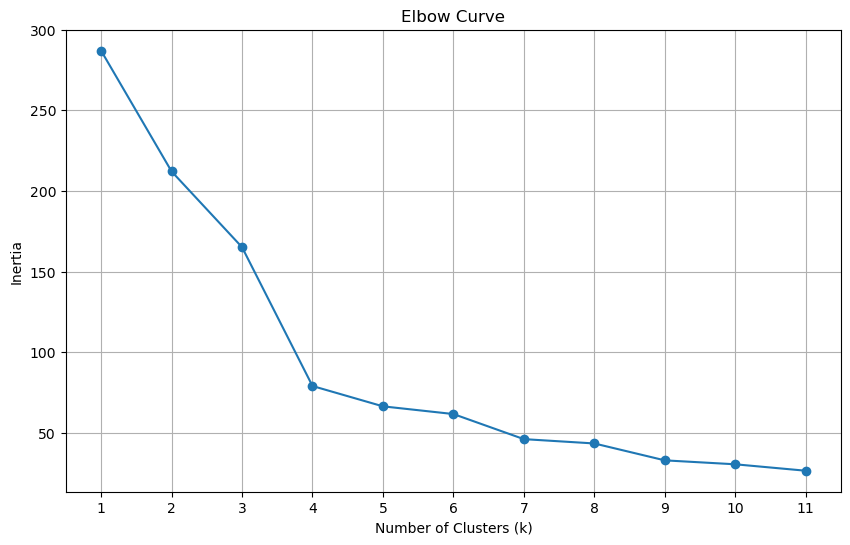

In [17]:
# Plot a line chart using hvplot
df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    xticks=k_values
)

# Plot a line chart using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
The best value for k is 4 as this is where the inertia starts to decrease at a slower rate, indicating that adding more clusters beyond this point does not significantly improve the model's performance.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [18]:
# Initialize the K-Means model using the best value for k
# Replace this with the best value for k that you identified
best_k_value = 4  

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k_value, random_state=1)

# Print the model to confirm initialization
print(kmeans_model)

KMeans(n_clusters=4, random_state=1)


In [19]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_scaled)

# Optionally, you can print a message to confirm that the model has been fitted
print("K-Means model has been fitted to the scaled data.")

K-Means model has been fitted to the scaled data.


c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_predictions = kmeans_model.predict(df_scaled)  # Assuming df_scaled is your scaled DataFrame

# Print the resulting array of cluster values
print(cluster_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [22]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()



In [23]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['Cluster'] = cluster_predictions

# Display the copy of the scaled DataFrame
print(df_scaled_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [24]:
# Create a scatter plot using hvPlot
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d",    
    by="Cluster",                       
    hover_cols=["coin_id"],            
    title="Cryptocurrency Price Change Percentage",
    xlabel="24h Price Change Percentage",
    ylabel="7d Price Change Percentage"
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [25]:
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca_model = PCA(n_components=3)

# Print the model to confirm initialization
print(pca_model)

PCA(n_components=3)


In [26]:
# Use the PCA model with fit_transform to reduce the original scaled DataFrame
pca_data = pca_model.fit_transform(df_scaled_copy)  

# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=[f'PCA{i+1}' for i in range(3)], index=df_scaled_copy.index)

# View the scaled PCA data
print(df_pca.head())

                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin       0.448908 -1.245376 -0.850640
ethereum      0.495367 -0.899823 -1.317559
tether       -0.818846  0.071899  0.695015
ripple       -0.840357  0.080054  0.544360
bitcoin-cash  0.813240 -2.669520 -1.643321


In [27]:
# Retrieve the explained variance to determine how much information
explained_variance = pca_model.explained_variance_ratio_
# can be attributed to each principal component.
print("Explained Variance for Each Principal Component:")
for i, variance in enumerate(explained_variance):
    print(f"PCA{i + 1}: {variance:.4f}")

Explained Variance for Each Principal Component:
PCA1: 0.3487
PCA2: 0.3136
PCA3: 0.2263


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** So, the total explained variance of the three principal components is 0.8886, or 88.86% of the total variance in the original dataset. 

In [28]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=[f'PCA{i+1}' for i in range(3)])

# Copy the crypto names (coin_id) from the original scaled DataFrame
df_pca['coin_id'] = df_scaled_copy.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
print(df_pca.head())

                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin       0.448908 -1.245376 -0.850640
ethereum      0.495367 -0.899823 -1.317559
tether       -0.818846  0.071899  0.695015
ripple       -0.840357  0.080054  0.544360
bitcoin-cash  0.813240 -2.669520 -1.643321


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [30]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [34]:
# Create a PCA model instance and set n_components=3
pca_model = PCA(n_components=3)

# Use the PCA model with fit_transform to reduce the original scaled DataFrame
pca_data = pca_model.fit_transform(df_scaled)  # Replace df_scaled with your actual scaled DataFrame

# Create a new DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(pca_data, columns=[f'PCA{i+1}' for i in range(3)], index=df_scaled.index)

In [35]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
   
    # 1. Create a KMeans model using the loop counter for n_clusters
    model = KMeans(n_clusters=k, random_state=1)
    
    # 2. Fit the model to the data using df_market_data_pca
    model.fit(df_market_data_pca)  
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Print the inertia values
print(inertia)

c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmea

[256.8740855678925, 182.33953007775648, 135.4424076245421, 49.665496651797355, 38.67258217591795, 34.50757653758153, 23.72836478127476, 18.574523440183192, 15.572672210433334, 11.407666572096911, 8.05882188871273]


c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,  # List of k-values
    'inertia': inertia  # List of inertia values computed earlier
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow.head())

   k     inertia
0  1  256.874086
1  2  182.339530
2  3  135.442408
3  4   49.665497
4  5   38.672582


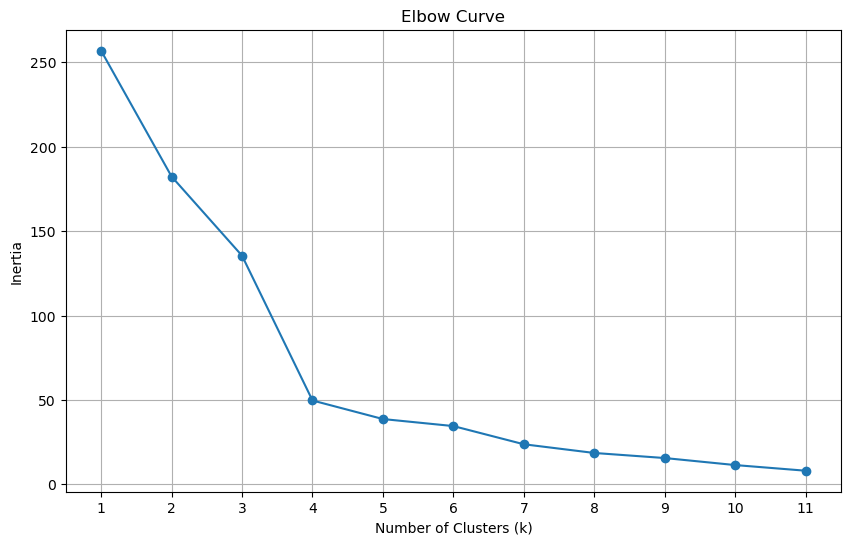

In [37]:
# Plot a line chart using hvplot
df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    xticks=k_values
)


# Plot a line chart using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**The best value for k when using the PCA data is 4, as this is where the inertia begins to decrease at a slower rate, indicating that adding more clusters does not significantly improve the model's performance.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [42]:
# Set the best value for k
best_k_value = 3  # Replace with your optimal k value

# Initialize the K-Means model
model = KMeans(n_clusters=best_k_value, random_state=1)

# Fit the model to your data 
model.fit(df_scaled_copy)

# Make predictions
predictions = model.predict(df_scaled_copy)

# Add the predictions to your DataFrame (optional)
df_scaled_copy['cluster'] = predictions

c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
# Fit the K-Means model using the PCA data
df_pca = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

In [47]:
# Import the KMeans module
from sklearn.cluster import KMeans

# Initialize the K-Means model with the desired number of clusters (e.g., 3)
model = KMeans(n_clusters=3, random_state=0)

# Fit the model using the PCA DataFrame
model.fit(df_pca)

# Predict the clusters
cluster_values = model.predict(df_pca)

# Print the resulting array of cluster values
print(cluster_values)

c:\Users\ayayloyan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 2
 0 0 0 0]


In [48]:
# Create a copy of the scaled PCA DataFrame
df_pca_predictions = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_predictions['Cluster'] = cluster_values  # Assuming cluster_values contains the predicted cluster labels

# Display the copy of the scaled PCA DataFrame
print(df_pca_predictions)


        PCA1      PCA2      PCA3  Cluster
0  -0.600667  0.842760  0.461595        2
1  -0.458261  0.458466  0.952877        2
2  -0.433070 -0.168126 -0.641752        0
3  -0.471835 -0.222660 -0.479053        0
4  -1.157800  2.041209  1.859715        2
5  -0.516534  1.388377  0.804071        2
6  -0.450711  0.517699  2.846143        2
7  -0.345600  0.729439  1.478013        2
8  -0.649468  0.432165  0.600303        2
9  -0.759014 -0.201200 -0.217653        0
10 -0.248198 -1.376252 -1.462026        0
11 -0.438408 -0.175337 -0.663388        0
12 -0.693425 -0.473815 -0.527597        0
13  0.060499  2.909404  1.498571        2
14 -0.393352 -0.108192 -0.012756        0
15 -0.796176 -0.494409  1.082812        0
16  0.064075 -1.269825 -1.098829        0
17 -0.489015 -0.732719 -0.062543        0
18 -0.306272  0.703415  1.714224        2
19 -0.513528 -0.142802 -0.656566        0
20 -0.362120 -0.986914 -0.728752        0
21 -0.604265  0.827398  0.439316        2
22 -0.413296 -0.674115 -1.076628  

In [51]:
print(df_pca_predictions.columns)

Index(['PCA1', 'PCA2', 'PCA3', 'Cluster'], dtype='object')


In [52]:
print(df_pca_predictions.dtypes)

PCA1       float64
PCA2       float64
PCA3       float64
Cluster      int32
dtype: object


In [53]:
print(df_pca_predictions.isnull().sum())

PCA1       0
PCA2       0
PCA3       0
Cluster    0
dtype: int64


In [54]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Create a scatter plot using hvPlot
scatter_plot = df_pca_predictions.hvplot.scatter(
    x="PCA1",          # X-axis as PCA1
    y="PCA2",          # Y-axis as PCA2
    by="Cluster",     # Color the points by the predicted cluster labels
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters Based on PCA"
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PCA1]   (PCA2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The fact that both analyses suggest k = 4 indicates that the clustering structure is robust across different feature sets. This consistency can strengthen confidence in the identified clusters.